#  Various examples for the paper

In [9]:
import axelrod as axl
import matplotlib

import matplotlib.pyplot as plt

In [15]:
font = {'weight': 'bold',
        'size'   : 50}
matplotlib.rc('font', **font)

In [11]:
%matplotlib inline

Fingerprinting
--------------

In [5]:
axl.seed(0)
strategy = axl.WinStayLoseShift
probe = axl.TitForTat

In [14]:
af = axl.AshlockFingerprint(strategy, probe)
data = af.fingerprint(turns=200, repetitions=10, step=0.05, progress_bar=False)

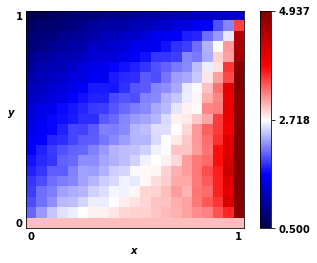

In [15]:
p = af.plot()

Ecological Tournament
---------------------

In [6]:
players = [axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.Grudger()]

In [7]:
tournament = axl.Tournament(players)
results = tournament.play(progress_bar=False)
eco = axl.Ecosystem(results)
eco.reproduce(100)

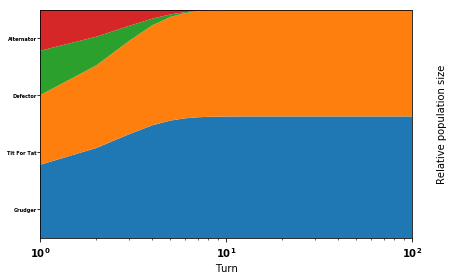

In [5]:
fig, ax = plt.subplots()
plot = axl.Plot(results)
p = plot.stackplot(eco, ax=ax)

ax.axes.tick_params(labelsize=10)
plt.xlim(0, 10 **2)
for tick in ax.yaxis.get_minor_ticks():
     tick.label.set_fontsize(400)

plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/ecological.pdf', bbox_inches='tight')

In [1]:
import axelrod_fortran as axlf

In [7]:
players = [axlf.Player(name) for name in axlf.second_tournament_strategies]

In [12]:
tournament = axl.Tournament(players)
results = tournament.play(progress_bar=False)
eco = axl.Ecosystem(results)
eco.reproduce(100)

/home/nightwing/anaconda3/envs/axelrod/lib/python3.6/site-packages/axelrod_fortran/player.py:88: UserWarning: 
You are playing a match with two copies of the same player.
However the axelrod fortran players share memory.
You can initialise an instance of an Axelrod_fortran player with a
`shared_library_name`
variable that points to a copy of the shared library.
  warnings.warn(message=message)


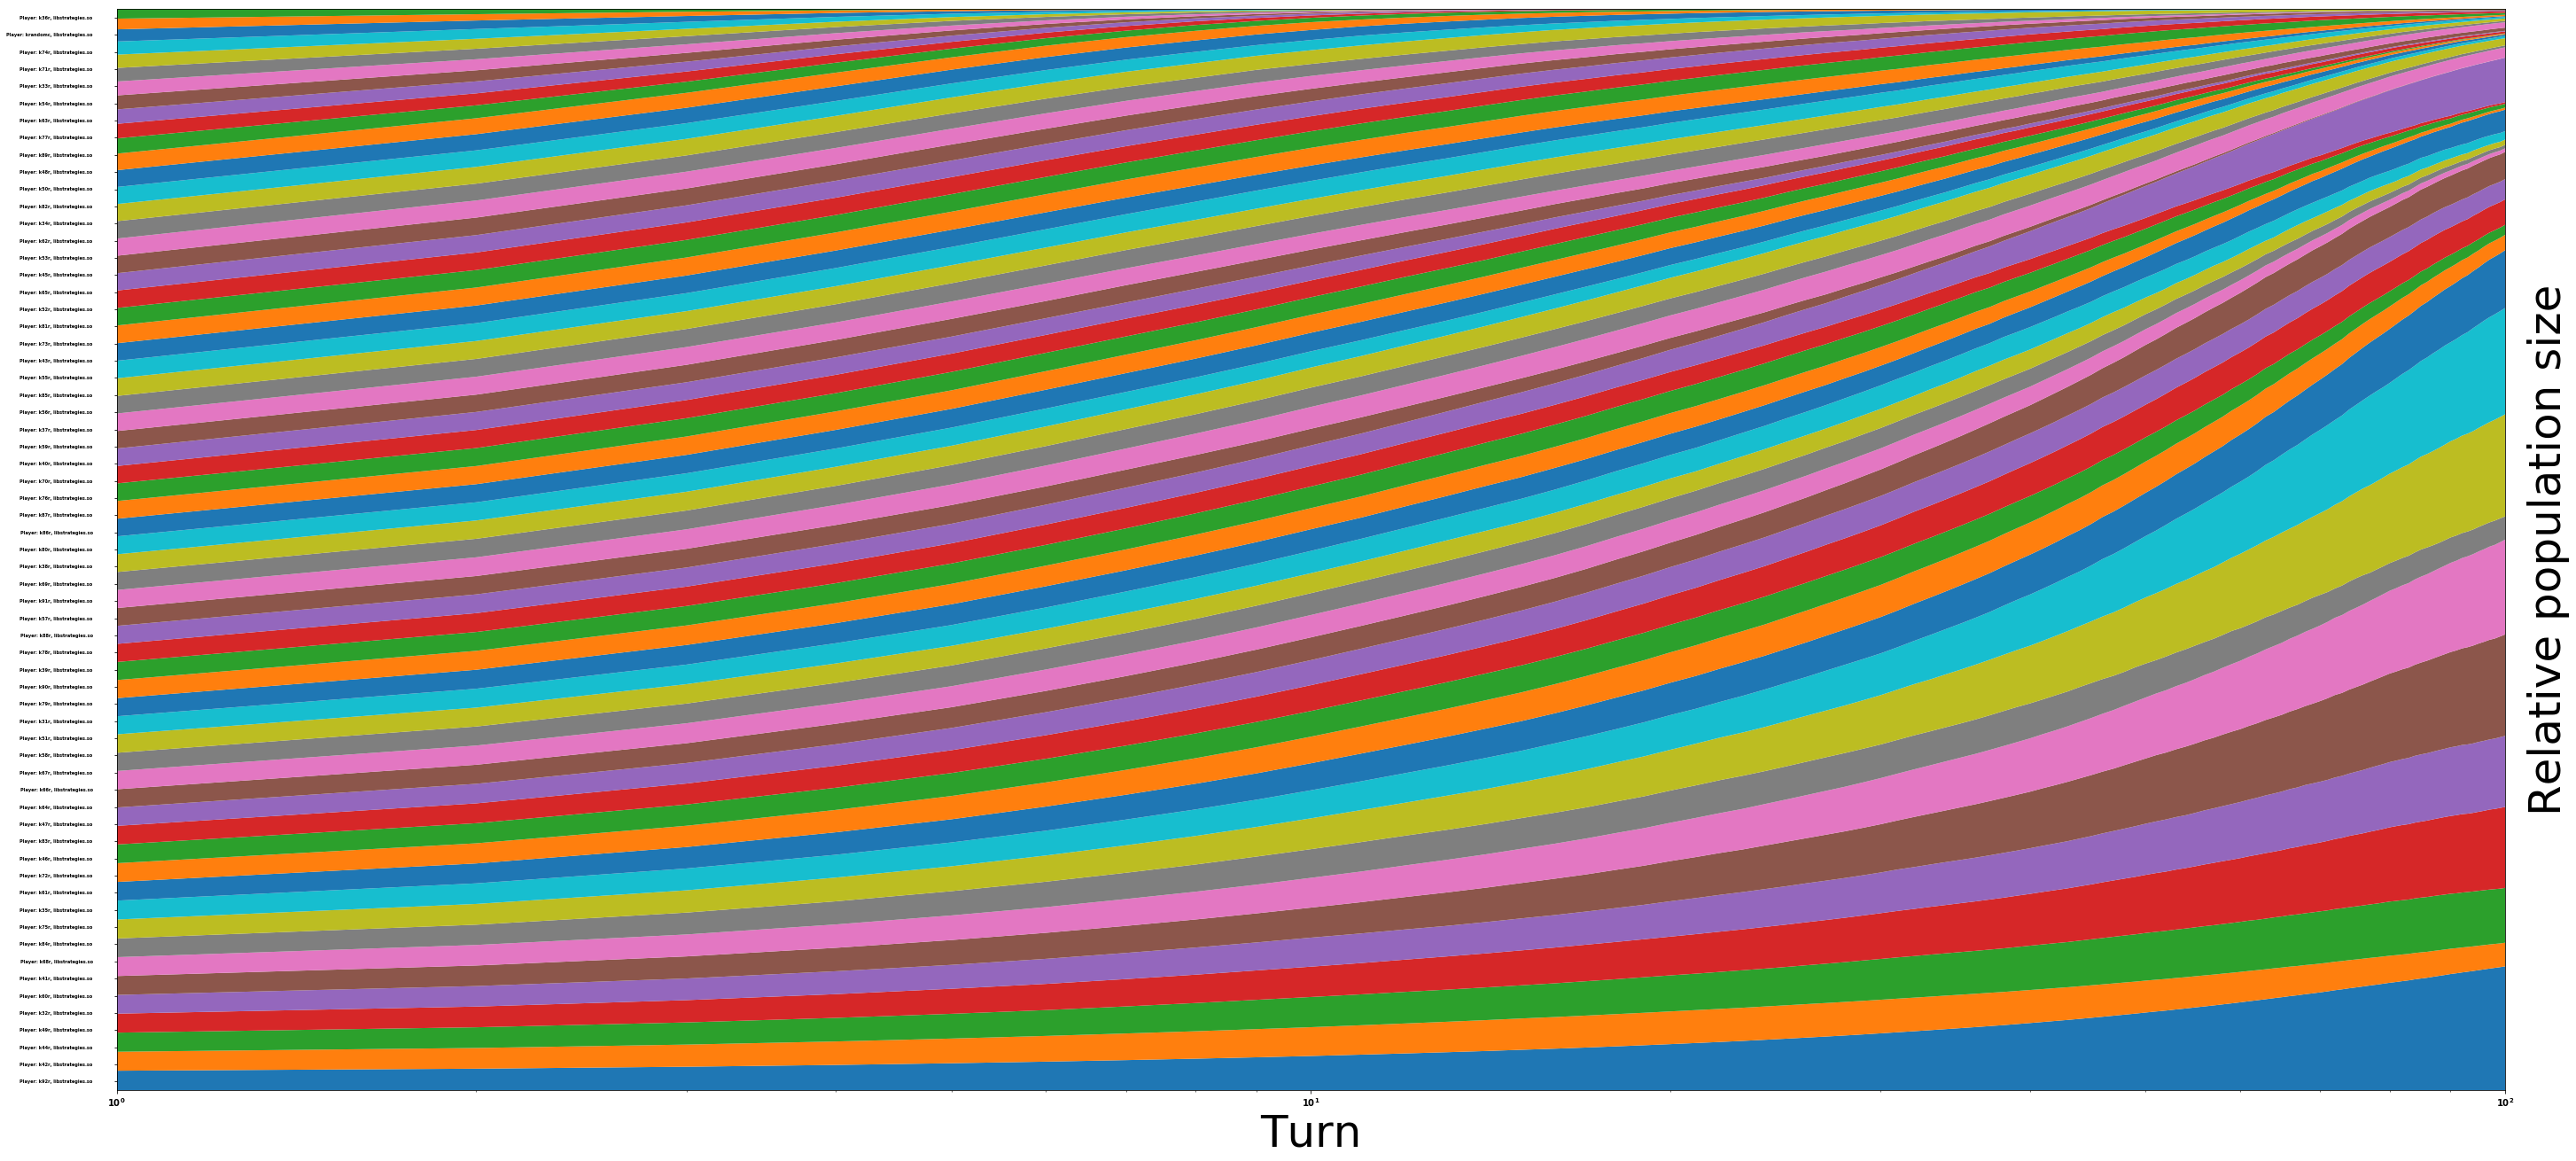

In [16]:
fig, ax = plt.subplots(figsize=(40, 20))
plot = axl.Plot(results)
p = plot.stackplot(eco, ax=ax)

ax.axes.tick_params(labelsize=10)
plt.xlim(0, 10 **2)
for tick in ax.yaxis.get_minor_ticks():
     tick.label.set_fontsize(400)

Tit for Tat interactions table
------------------------------

In [15]:
player = axl.TitForTat()
opponents = [axl.Cooperator(), axl.Defector(), axl.Alternator()]

In [16]:
match = axl.Match([player, opponents[2]], turns=8)

In [20]:
str(match.play()).replace('),', '\\').replace(',', '&')

'[(C& C\\ (C& D\\ (D& C\\ (C& D\\ (D& C\\ (C& D\\ (D& C\\ (C& D)]'